# Instructions Conditionnelles: suite (2/3)

## Un programme avec des branchements conditionnels

Dans tous les exemples précédents, on connaissait par avance la valeur de ```x```, qui avait été entrée au départ. On savait donc à l'avance quelles instructions seraient exécutées et lesquelles ne le seraient pas. 
 
Ce type de branchement conditionnel permet d'écrire une séquence de calculs une seule fois sans connaître la valeur des données d'entrée, et de considérer toutes les possibilités. On aura de nombreuses situations où un calcul doit être effectué différemment selon la valeur des données.

#### Exemple 1:  valeur absolue
On peut reprendre ici l'exemple de la valeur absolue. La valeur absolue d'un nombre se calcule différemment selon si le nombre est positif ou négatif: pour un nombre positif, sa valeur absolue est le nombre lui-même, alors que s'il est négatif, sa valeur absolue est son opposé.

Voici un programme pour lire un nombre au clavier et calculer et afficher la valeur absolue du nombre:

In [1]:
nombre = float(input("Entrer un nombre quelconque:"))
if nombre>=0:
    absolue= nombre
else:
    absolue = -nombre
    
print("La valeur absolue du nombre est:", absolue)

Entrer un nombre quelconque: 37.5


La valeur absolue du nombre est: 37.5


On peut re-exécuter le programme avec un nombre négatif en entrée, et on verra que la valeur absolue du nombre est affiché correctement.

Comme souvent, il y aurait d'autres solutions possibles pour ce programme. On aurait par exemple pu remplacer le nombre par son opposé seulement s'il était négatif, et juste afficher la vaaleur du nombre à la fin:

In [2]:
nombre = float(input("Entrer un nombre quelconque:"))
if nombre<0:
    nombre= -nombre
    
print("La valeur absolue du nombre est:", nombre)

Entrer un nombre quelconque: -11.2


La valeur absolue du nombre est: 11.2


Pour un nombre positif, on aurait simplement sauté l'instruction qui remplace ```nombre``` par son opposé. Remarquer que la condition évalue cette fois si ```nombre``` est *négatif*, puisque dans le cas où ```nombre``` est positif on n'a rien à faire.

Cette solution, un peu plus concise, n'est pas forcément la meilleure: il est en général préférable d'utiliser une seule variable pour deux choses différentes (ici le nombre et sa valeur absolue), parce que ça rend le programme plus difficile à comprendre. Quand on a des programmes de trois lignes ce n'est pas grave, mais ce sont de bonnes habitudes à prendre pour quand on écrira du code plus long et complexe.

#### Exercice 1

Le code suivant permet à l'utilisateur d'entrer deux nombres. Ajouter une instruction conditionnelle ```if``` pour que le programme affiche ensuite **le plus grand des deux nombres**.

In [ ]:
n1 = int(input("Entrer un premier nombre:"))
n2 = int(input("Entrer un deuxième nombre:"))

# if ici
         
print("Le plus grand des deux nombres est: ", plusgrand);

#### Exemple 2: Hydro-Québec
On va détailler ici un autre calcul un peu complexe, où le besoin d'une branchement conditionnel est moins évident: calculer une facture hydro-québec.

On veut automatiquement calculer le montant à payer à Hydro-Québec pour une certaine consommation d'électricité.
Ce montant est calculé comme indiqué sur le site d'Hydro-Québec:
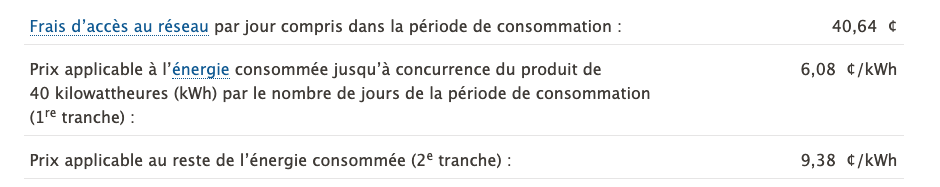

Le fait que deux tarifs existent, et qu'un des tarifs ne s'applique qu'à partir d'une certaine consommation, implique que le calcul peut se faire de deux manières différentes, selon si la consommation est basse ou plus élevée.

On va d'abord détailler les étapes du calcul sur un exemple, puis reprendre ces étapes dans un programme qui automatise ce calcul, avec une instruction conditionnelle.


Supposons qu'on ait consommé **2850 kWh** sur une période de **56 jours**. On va stocker ces données d'entrée dans des variables:

In [5]:
conso = 2850
jours = 56

Calculons les frais d'accès au réseau:

In [6]:
frais = 0.4064 * jours

Pour calculer le montant à payer pour l'*énergie consommée*, on calcule déjà le maximum d'énergie qui constitue la "première tranche": 40 kWh multiplié par le nombre de jours:

In [7]:
maxT1 = 40 * jours

print("max premiere tranche:", maxT1)

max premiere tranche: 2240


Ici on doit regarder le résultat, et prendre une décision: si notre consommation est en-dessous de cette limite, on payerait toute notre consommation au tarif bas. Si notre consommation dépasse la limite, on doit séparer notre consommation en deux tranches: on paye le tarif bas pour la première, et le tarif plus élevé pour la deuxième. 

Ici, on est dans le deuxième cas: notre consommation (2850 kWh) dépasse le montant alloué pour la première tranche (2240 kWh).

Le calcul est donc:

In [8]:
tranche1 = maxT1 * 0.0608

tranche2 = (conso - maxT1) * 0.0938

print(" Tranche 1: ", tranche1, "\n tranche 2: ", tranche2)

 Tranche 1:  136.192 
 tranche 2:  57.217999999999996


On paye \\$136.19 pour la première tranche (2240 kWh à \\$0.0608 par kWh) et \\$57.22 pour la deuxième tranche (610 kWh à \\0.0938 par kWh).

Il faut enfin ajouter les taxes (14.975%, non indiqué sur l'image ci-dessus). Le total à payer est donc:

In [9]:
(frais + tranche1 + tranche2)*1.14975

248.5396179

Notre facture totale sera donc de $248.54.

Comment ferait-on le calcul si la consommation était faible et n'utilisait que le tarif bas?

Prenons un autre exemple. Toujours sur 56 jours, on a cette fois utilisé seulement **1100 kwh**:

In [10]:
conso = 1100;

Les frais restent les mêmes, mais les montants pour les deux tranches sont différents: comme on est en-dessous du maximum de la première tranche, on paye toute notre consommation au tarif bas:

In [11]:
tranche1 = conso * 0.0608;
tranche2 = 0;

On recalcule le montant final après taxes:

In [12]:
(frais + tranche1 + tranche2)*1.14975

103.0617504

On aura dans ce cas une facture de $103.53.

### Automatisation du calcul
On va maintenant automatiser ce calcul dans un petit programme, dans lequel on aura une **instruction conditionnelle** qui nous permettra de calculer la facture comme dans le premier cas ou comme dans le deuxième.

Cette fois on va permettre à l'utilisateur de donner les données d'entrée au clavier:

In [14]:
print("Calcul d'une facture Hydro-Québec:")
conso = float(input("Entrer l'énergie consommée:"))
jours = int(input("Entrer le nombre de jours:"))

Calcul d'une facture Hydro-Québec:


Entrer l'énergie consommée: 2850
Entrer le nombre de jours: 56


Les premiers calculs:

In [15]:
frais = 0.4064 * jours;
maxT1 = 40* jours;

On doit maintenant déterminer si la consommation dépasse le montant alloué pour la première tranche, à l'aide d'une expression conditionnelle, et déterminer les montants à payer pour la première tranche (```tranche1```) et pouyr la deuxième (```conso2```):

**Si** la consommation (```conso```) dépasse ```maxT1``` **alors** on va calculer le montant à payer comme ceci:
```
tranche1 = maxT1 * 0.0608
tranche2 = (conso - maxT1) * 0.0938
```
**Sinon** on va calculer le montant à payer simplement comme cela:
```
tranche1 = conso * 0.0608
tranche2 = 0
```

En Python on écrit donc:

In [16]:
if conso > maxT1:
    tranche1 = maxT1 * 0.0608
    tranche2 = (conso - maxT1) * 0.0938
else:
    tranche1 = conso * 0.0608
    tranche2 = 0

On termine par le montant total après taxes, qui se calcule de la même façon dans les deux cas:

In [17]:
facture = (frais + tranche1 + tranche2) * 1.14975

print(f"Le montant de la facture sera de ${facture:.2f}")   # affichage formaté avec deux chiffres après la virgule  

Le montant de la facture sera de $248.54


On obtient bien le même résultat.
Le même programme peut être utilisé pour calculer les montants de factures pour d'autres consommations et périodes de jours. 

#### Exercice 2

Supposons qu'un autobus passe toutes les heures dans une certaine rue, 12 minutes après l'heure: 0h12, 1h12, 2h12, etc. 

Modifier le programme ci-dessous qui demande l'heure à l'utilisateur, puis affiche le nombre de minutes à attendre pour l'autobus.

Indication: le calcul est différent selon si il est plus ou moins de 12 minutes après l'heure. 

In [18]:
print("Quelle heure est-il?")
heures = int(input("Entrez les heures"))
minutes = int(input("Entrez les minutes"))

temps = 24 # remplacer par le calcul correct

print(f"L'autobus arrive dans {temps:d} minutes.")

Quelle heure est-il?


Entrez les heures 7
Entrez les minutes 19


L'autobus arrive dans 24 minutes.


##### Résumé

Dans ce notebook on a vu par des exemples comment écrire un programme qui réalise un calcul avec des branchements conditionnels.
La méthode générale est la suivante:
1. Pour bien comprendre le fonctionnement, effectuer le calcul à la main (ou à la calculatrice) sur un exemple de données.
2. Chercher d'autres exemples de données pour lesquelles les calculs sont différents
3. Chercher la condition qui va différencier les deux situations, et identifier la partie du calcul qui change.
4. Écrire le programme de manière à ce que seules les instructions qui changent soient incluses dans une structure conditionnelle.